<a href="https://colab.research.google.com/github/sh01k/teaching/blob/master/lin_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O test.wav "https://drive.google.com/uc?export=download&id=15VyUDMAXYF_7crH7TfjMysG35S4OuKDt"
filename = "./test.wav"

--2020-05-07 10:12:14--  https://drive.google.com/uc?export=download&id=15VyUDMAXYF_7crH7TfjMysG35S4OuKDt
Resolving drive.google.com (drive.google.com)... 108.177.119.101, 108.177.119.138, 108.177.119.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j8592ss6pln5i8mkdib6jol7rron37i0/1588846275000/12513266162329107218/*/15VyUDMAXYF_7crH7TfjMysG35S4OuKDt?e=download [following]
--2020-05-07 10:12:14--  https://doc-0k-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j8592ss6pln5i8mkdib6jol7rron37i0/1588846275000/12513266162329107218/*/15VyUDMAXYF_7crH7TfjMysG35S4OuKDt?e=download
Resolving doc-0k-6o-docs.googleusercontent.com (doc-0k-6o-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-0k-6o-docs.googleusercontent.com (d

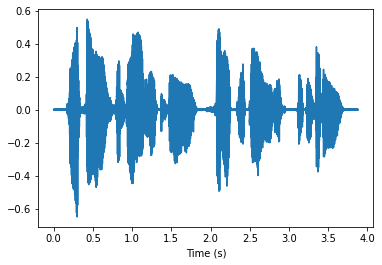

In [0]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import wave
import IPython.display

# Open audio file
wf = wave.open(filename, mode='rb')

# Sampling frequency
fs = int(wf.getframerate())

# Samples
nsamples = wf.getnframes()
t = np.arange(nsamples)/fs

# Read to buffer
buf = wf.readframes(-1)
if wf.getsampwidth() == 2:
  data = np.frombuffer(buf, dtype='int16')/(2**(16-1))
elif wf.getsampwidth() == 4:
  data = np.frombuffer(buf, dtype='int32')/(2**(32-1))

nchannels = wf.getnchannels()
if nchannels>1:
  s = data[:: nchannels]
else:
  s = data

# Close audio file
wf.close()

# Plot clean speech
plt.plot(t,s)
plt.xlabel("Time (s)")
plt.show()

IPython.display.Audio(s, rate=fs)

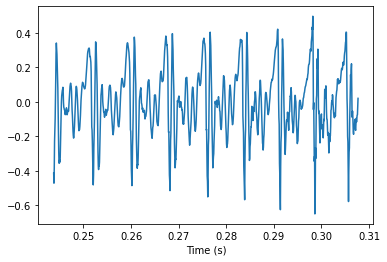

In [0]:
# Frame
N = 1024 #length
N0 = 3900 #start

# Frequency
f = np.arange(int(N/2))*fs/N

# Window function
win = np.hamming(N)

# Signal of frame
x = s[N0:N0+N]

# FFT
xf = np.fft.fft(x*win,N)

# Plot
plt.plot(t[N0:N0+N],x)
plt.xlabel("Time (s)")
plt.show()

IPython.display.Audio(x, rate=fs)


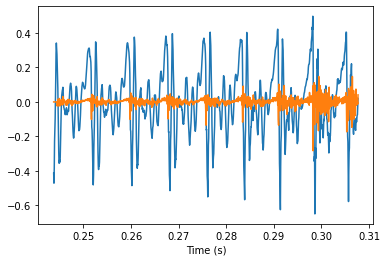

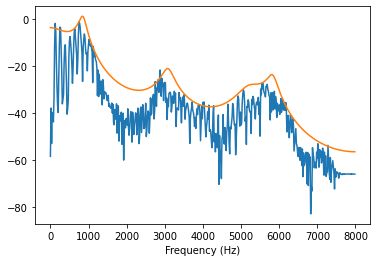

In [0]:
# Order
L = 11

# Autocorrelation
R = np.real(np.fft.ifft( np.abs( np.fft.fft(x*win,N*2) )**2, N*2))
R = R[0:N]/N

# LP coefficient estimation
Rmat = linalg.toeplitz(R[0:L])
h = linalg.inv(Rmat) @ np.array([R[1:L+1]]).T

res = np.zeros(N)
J = 0 # mean square error
for ii in range(L,N):
  res[ii] = x[ii] - h.T @ np.array([np.flip(x[ii-L:ii])]).T
  J = J + res[ii]**2
J = J/(N-L)

# Power spectrum density
psd = J/(np.abs(np.fft.fft(np.insert(-h, 0, 1), N))**2) 

# Plot
plt.plot(t[N0:N0+N],x,t[N0:N0+N],res)
plt.xlabel("Time (s)")
plt.show()

plt.plot(f,10*np.log10(np.abs(xf[0:int(N/2)])**2/N),f,10*np.log10(psd[0:int(N/2)]))
plt.xlabel("Frequency (Hz)")
plt.show()
